In [ ]:
import os
import torch
import pandas as pd
import numpy as np
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, random_split, DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
from collections import OrderedDict
from google.colab import files

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/wyze/StanfordDogs/testing/wyze-20220426T173221Z-001.zip -d /content/drive/MyDrive/wyze/StanfordDogs/testing/new_test

In [ ]:
data_dir = '/content/drive/MyDrive/wyze/StanfordDogs/Images'

# Define train and test path 
train_path = os.path.join(data_dir, 'train')

#test_path = os.path.join(data_dir, 'test88/test')

#test_path = '/content/drive/MyDrive/wyze/StanfordDogs/testing/new_test/new_testImages'



In [ ]:
# wyze images
test_path = '/content/drive/MyDrive/wyze/StanfordDogs/testing/new_test/new_testImages'

In [ ]:
#youtube 
test_path_yt = '/content/drive/MyDrive/wyze/StanfordDogs/testing/yt'


In [ ]:
google_test = '/content/drive/MyDrive/wyze/StanfordDogs/testing/google'

In [ ]:
dataset = ImageFolder(train_path)
print(dataset)
train_size = len(dataset)
print("Number of Train images:", train_size)
train_classes = len(dataset.classes)
print("Number of Training class:", train_classes)

Dataset ImageFolder
    Number of datapoints: 20579
    Root location: /content/drive/MyDrive/wyze/StanfordDogs/Images/train
Number of Train images: 20579
Number of Training class: 120


In [ ]:
dogs_dict = dataset.class_to_idx
print(dogs_dict)
print("Num of classes", len((dataset.class_to_idx)))

{'n02085620-Chihuahua': 0, 'n02085782-Japanese_spaniel': 1, 'n02085936-Maltese_dog': 2, 'n02086079-Pekinese': 3, 'n02086240-Shih-Tzu': 4, 'n02086646-Blenheim_spaniel': 5, 'n02086910-papillon': 6, 'n02087046-toy_terrier': 7, 'n02087394-Rhodesian_ridgeback': 8, 'n02088094-Afghan_hound': 9, 'n02088238-basset': 10, 'n02088364-beagle': 11, 'n02088466-bloodhound': 12, 'n02088632-bluetick': 13, 'n02089078-black-and-tan_coonhound': 14, 'n02089867-Walker_hound': 15, 'n02089973-English_foxhound': 16, 'n02090379-redbone': 17, 'n02090622-borzoi': 18, 'n02090721-Irish_wolfhound': 19, 'n02091032-Italian_greyhound': 20, 'n02091134-whippet': 21, 'n02091244-Ibizan_hound': 22, 'n02091467-Norwegian_elkhound': 23, 'n02091635-otterhound': 24, 'n02091831-Saluki': 25, 'n02092002-Scottish_deerhound': 26, 'n02092339-Weimaraner': 27, 'n02093256-Staffordshire_bullterrier': 28, 'n02093428-American_Staffordshire_terrier': 29, 'n02093647-Bedlington_terrier': 30, 'n02093754-Border_terrier': 31, 'n02093859-Kerry_blue

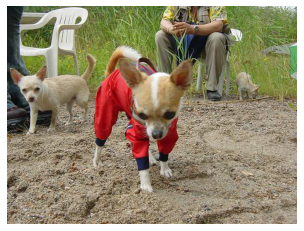

In [ ]:
plt.imshow(dataset[10][0])
plt.axis('off')
plt.show()

In [ ]:
dog_labels_train = []

def rename(name):
    return ' '.join(' '.join(name.split('-')[1:]).split('_'))

for n in dataset.classes:
    dog_labels_train.append(rename(n))

In [ ]:
dog_labels_train

['Chihuahua',
 'Japanese spaniel',
 'Maltese dog',
 'Pekinese',
 'Shih Tzu',
 'Blenheim spaniel',
 'papillon',
 'toy terrier',
 'Rhodesian ridgeback',
 'Afghan hound',
 'basset',
 'beagle',
 'bloodhound',
 'bluetick',
 'black and tan coonhound',
 'Walker hound',
 'English foxhound',
 'redbone',
 'borzoi',
 'Irish wolfhound',
 'Italian greyhound',
 'whippet',
 'Ibizan hound',
 'Norwegian elkhound',
 'otterhound',
 'Saluki',
 'Scottish deerhound',
 'Weimaraner',
 'Staffordshire bullterrier',
 'American Staffordshire terrier',
 'Bedlington terrier',
 'Border terrier',
 'Kerry blue terrier',
 'Irish terrier',
 'Norfolk terrier',
 'Norwich terrier',
 'Yorkshire terrier',
 'wire haired fox terrier',
 'Lakeland terrier',
 'Sealyham terrier',
 'Airedale',
 'cairn',
 'Australian terrier',
 'Dandie Dinmont',
 'Boston bull',
 'miniature schnauzer',
 'giant schnauzer',
 'standard schnauzer',
 'Scotch terrier',
 'Tibetan terrier',
 'silky terrier',
 'soft coated wheaten terrier',
 'West Highland wh

In [ ]:
test_dataset = ImageFolder(test_path) # wyze images
print(test_dataset)
test_size = len(test_dataset)
print("Number of Train images:", test_size)
test_classes = len(test_dataset.classes)
print("Number of Training class:", test_classes)

Dataset ImageFolder
    Number of datapoints: 1817
    Root location: /content/drive/MyDrive/wyze/StanfordDogs/testing/new_test/new_testImages
Number of Train images: 1817
Number of Training class: 25


In [ ]:
print(len(test_dataset.imgs))

1817


In [ ]:
test_dataset = ImageFolder(test_path_yt) # youtube images
print(test_dataset)
test_size = len(test_dataset)
print("Number of Train images:", test_size)
test_classes = len(test_dataset.classes)
print("Number of Training class:", test_classes)

Dataset ImageFolder
    Number of datapoints: 500
    Root location: /content/drive/MyDrive/wyze/StanfordDogs/testing/yt
Number of Train images: 500
Number of Training class: 25


In [ ]:
test_dataset = ImageFolder(google_test) #google
print(test_dataset)
test_size = len(test_dataset)
print("Number of Train images:", test_size)
test_classes = len(test_dataset.classes)
print("Number of Training class:", test_classes)

Dataset ImageFolder
    Number of datapoints: 676
    Root location: /content/drive/MyDrive/wyze/StanfordDogs/testing/google
Number of Train images: 676
Number of Training class: 25


In [ ]:
test_dataset.classes

['n02085620-Chihuahua',
 'n02086646-Blenheim_spaniel',
 'n02087046-toy_terrier',
 'n02088364-beagle',
 'n02092339-Weimaraner',
 'n02093428-American_Staffordshire_terrier',
 'n02095314-wire-haired_fox_terrier',
 'n02097047-miniature_schnauzer',
 'n02098286-West_Highland_white_terrier',
 'n02099601-golden_retriever',
 'n02099712-Labrador_retriever',
 'n02105641-Old_English_sheepdog',
 'n02106030-collie',
 'n02106550-Rottweiler',
 'n02106662-German_shepherd',
 'n02107142-Doberman',
 'n02108089-boxer',
 'n02110063-malamute',
 'n02110185-Siberian_husky',
 'n02110958-pug',
 'n02112018-Pomeranian',
 'n02113023-Pembroke',
 'n02113186-Cardigan',
 'n02113799-standard_poodle',
 'n02115641-dingo']

In [ ]:
test_dict = test_dataset.class_to_idx
print(test_dict)
print("Num of classes : ", len((test_dict)))

{'n02085620-Chihuahua': 0, 'n02086646-Blenheim_spaniel': 1, 'n02087046-toy_terrier': 2, 'n02088364-beagle': 3, 'n02092339-Weimaraner': 4, 'n02093428-American_Staffordshire_terrier': 5, 'n02095314-wire-haired_fox_terrier': 6, 'n02097047-miniature_schnauzer': 7, 'n02098286-West_Highland_white_terrier': 8, 'n02099601-golden_retriever': 9, 'n02099712-Labrador_retriever': 10, 'n02105641-Old_English_sheepdog': 11, 'n02106030-collie': 12, 'n02106550-Rottweiler': 13, 'n02106662-German_shepherd': 14, 'n02107142-Doberman': 15, 'n02108089-boxer': 16, 'n02110063-malamute': 17, 'n02110185-Siberian_husky': 18, 'n02110958-pug': 19, 'n02112018-Pomeranian': 20, 'n02113023-Pembroke': 21, 'n02113186-Cardigan': 22, 'n02113799-standard_poodle': 23, 'n02115641-dingo': 24}
Num of classes :  25


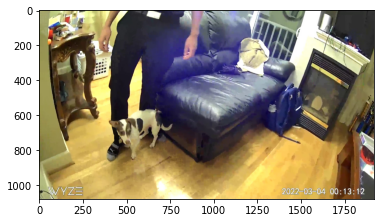

In [ ]:
plt.imshow(test_dataset[11][0]) #wyze images
plt.axis('on')
plt.show()

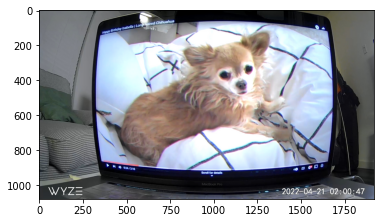

In [ ]:
plt.imshow(test_dataset[10][0]) #youtube images
plt.axis('on')
plt.show()

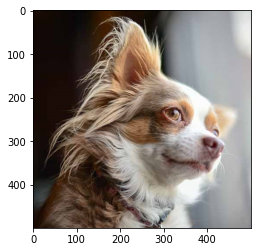

In [ ]:
plt.imshow(test_dataset[10][0]) # google images
plt.axis('on')
plt.show()

In [ ]:
dog_labels_test = []

def rename(name):
    return ' '.join(' '.join(name.split('-')[1:]).split('_'))

for n in test_dataset.classes:
    dog_labels_test.append(rename(n))

In [ ]:
print("Number of Test Classes:" , len(dog_labels_test))
dog_labels_test

Number of Test Classes: 25


['Chihuahua',
 'Blenheim spaniel',
 'toy terrier',
 'beagle',
 'Weimaraner',
 'American Staffordshire terrier',
 'wire haired fox terrier',
 'miniature schnauzer',
 'West Highland white terrier',
 'golden retriever',
 'Labrador retriever',
 'Old English sheepdog',
 'collie',
 'Rottweiler',
 'German shepherd',
 'Doberman',
 'boxer',
 'malamute',
 'Siberian husky',
 'pug',
 'Pomeranian',
 'Pembroke',
 'Cardigan',
 'standard poodle',
 'dingo']

Creating training, validation and testing dataset


In [ ]:
random_seed = 45
torch.manual_seed(random_seed);

In [ ]:
dataset_size = len(dataset) #wyze
print("Train set before splitting:", dataset_size)
val_pct = 0
val_size = int(dataset_size*val_pct)
train_size = dataset_size - val_size

print("Train set : {} \nVal set : {} \nTest set : {}".format(train_size , val_size, test_size))
#train_size, val_size, test_size

Train set before splitting: 20579
Train set : 20579 
Val set : 0 
Test set : 1817


In [ ]:
dataset_size = len(dataset) #youtube
print("Train set before splitting:", dataset_size)
val_pct = 0
val_size = int(dataset_size*val_pct)
train_size = dataset_size - val_size

print("Train set : {} \nVal set : {} \nTest set : {}".format(train_size , val_size, test_size))
#train_size, val_size, test_size

Train set before splitting: 20579
Train set : 20579 
Val set : 0 
Test set : 500


In [ ]:
dataset_size = len(dataset) #Google
print("Train set before splitting:", dataset_size)
val_pct = 0
val_size = int(dataset_size*val_pct)
train_size = dataset_size - val_size

print("Train set : {} \nVal set : {} \nTest set : {}".format(train_size , val_size, test_size))
#train_size, val_size, test_size

Train set before splitting: 20579
Train set : 20579 
Val set : 0 
Test set : 676


In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size]) # wyze
test_ds, _ = random_split(test_dataset, [len(test_dataset), 0])

len(train_ds), len(val_ds), len(test_ds)

(20579, 0, 1817)

In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size]) # youtube
test_ds, _ = random_split(test_dataset, [len(test_dataset), 0])

len(train_ds), len(val_ds), len(test_ds)

(20579, 0, 500)

In [ ]:
train_ds, val_ds = random_split(dataset, [train_size, val_size]) # google
test_ds, _ = random_split(test_dataset, [len(test_dataset), 0])

len(train_ds), len(val_ds), len(test_ds)

(20579, 0, 676)

n02100735-English_setter
<class 'PIL.Image.Image'>


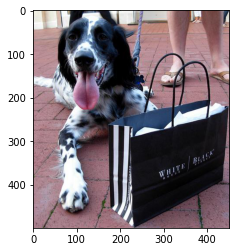

In [ ]:
img, label = train_ds[6]
print(dataset.classes[label])
plt.imshow(img)
print(type(img))

n02099601-golden_retriever
<class 'PIL.Image.Image'>


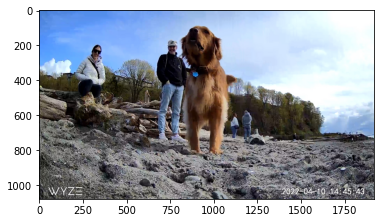

In [ ]:
img, label = test_ds[6] #wyze images
print(test_dataset.classes[label])
plt.imshow(img)
print(type(img))

n02087046-toy_terrier
<class 'PIL.Image.Image'>


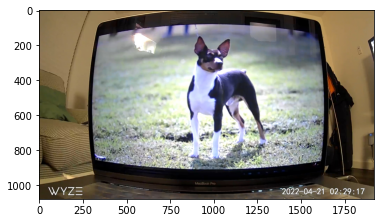

In [ ]:
img, label = test_ds[6] #youtube images
print(test_dataset.classes[label])
plt.imshow(img)
print(type(img))

n02099712-Labrador_retriever
<class 'PIL.Image.Image'>


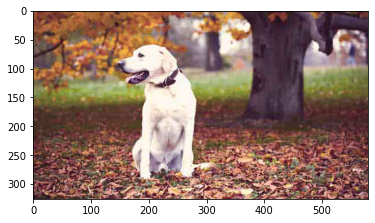

In [ ]:
img, label = test_ds[6] # google images
print(test_dataset.classes[label])
plt.imshow(img)
print(type(img))

custom dataset

In [ ]:
class DogBreedDataset(Dataset):
    
    def __init__(self, ds, transform=None):
        self.ds = ds
        self.transform = transform
        
    def __len__(self):
        return len(self.ds)
    
    def __getitem__(self, idx):
        img, label = self.ds[idx]
        if self.transform:
            img = self.transform(img)  
            return img, label

In [ ]:
norm_mean = [0.485, 0.456, 0.406]
norm_std = [0.229, 0.224, 0.225]

In [ ]:
train_transform = transforms.Compose([
#    transforms.Resize((224, 224)),
    transforms.Resize((256, 256)),
    #transforms.RandomCrop(224, padding=4, padding_mode='reflect'),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomRotation(degrees=30),
    transforms.GaussianBlur(kernel_size=3.0, sigma=(0.1, 2.0)),
    transforms.ColorJitter(brightness=0.1, contrast=0.2, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
#    transforms.Normalize(*imagenet_stats, inplace=True)
    
])

val_transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
#    transforms.Normalize(*imagenet_stats, inplace=True)
])

test_transform = transforms.Compose([
    transforms.Resize((256,256)), 
    transforms.ToTensor(),
#    transforms.Normalize(*imagenet_stats, inplace=True)
])

In [ ]:
train_dataset = DogBreedDataset(train_ds, train_transform)
val_dataset = DogBreedDataset(val_ds, val_transform)
test_dataset = DogBreedDataset(test_ds, test_transform)

In [ ]:
batch_size =64

# Create DataLoaders
train_dl = DataLoader(train_dataset, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_dataset, batch_size*2, num_workers=2, pin_memory=True)
test_dl = DataLoader(test_dataset, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
for i in train_dl:
  print(i)
  break

In [ ]:
for i in test_dl:
  print(i)
  break

In [ ]:
def show_batch(dl):
    for img, lb in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(img.cpu(), nrow=16).permute(1,2,0))
        break

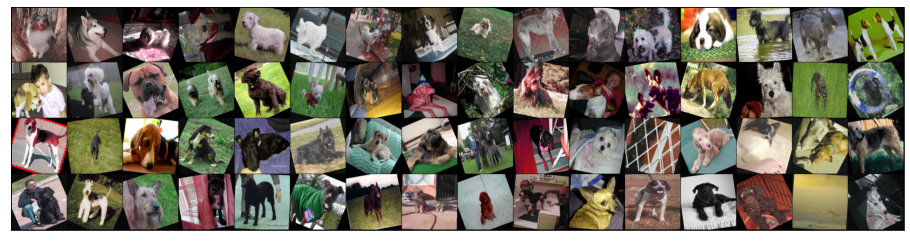

In [ ]:
show_batch(train_dl) 

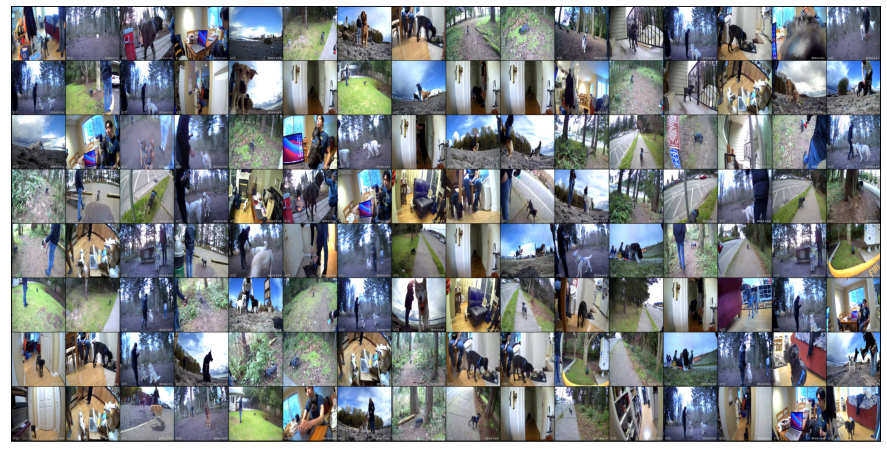

In [ ]:
show_batch(test_dl) # wyze images

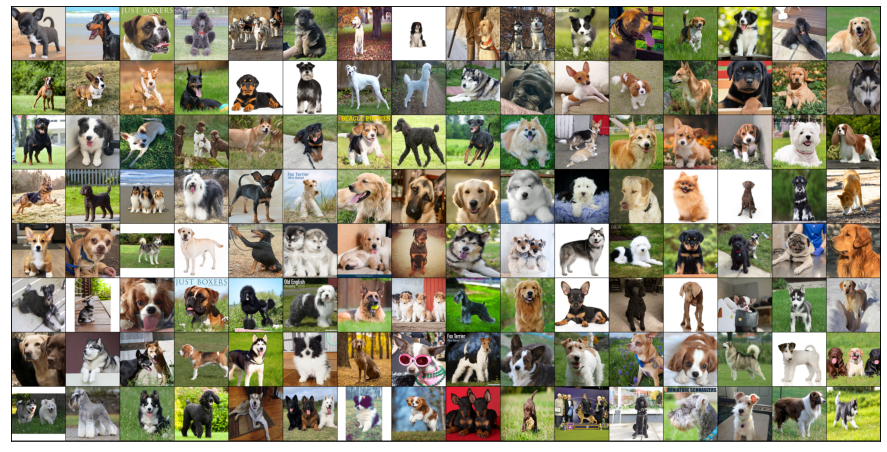

In [ ]:
show_batch(test_dl) # google images

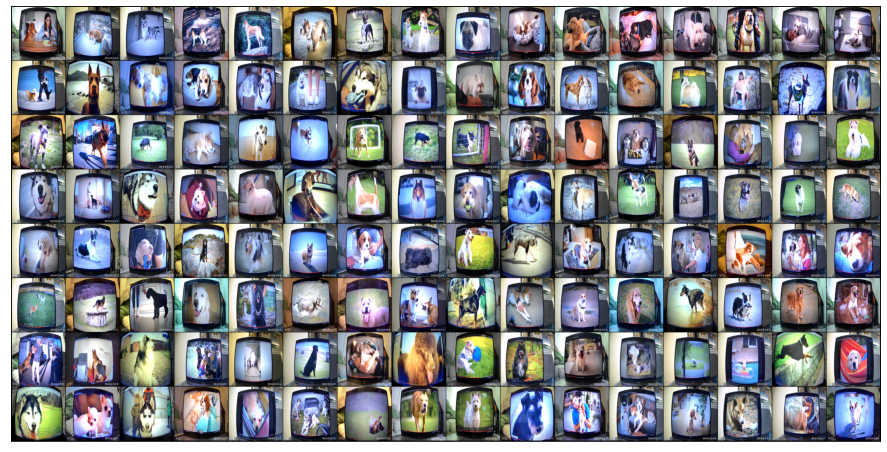

In [ ]:
show_batch(test_dl) # youtube images

network

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    # training step
    def training_step(self, batch):
        img, targets = batch
        out = self(img)
        loss = F.nll_loss(out, targets)
        return loss
    
    # validation step
    def validation_step(self, batch):
        img, targets = batch
        out = self(img)
        loss = F.nll_loss(out, targets)
        acc = accuracy(out, targets)
        return {'val_acc':acc.detach(), 'val_loss':loss.detach()}
    
    # validation epoch end
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
        
    # print result end epoch
    def epoch_end(self, epoch, result):
        print("Epoch [{}] : train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result["train_loss"], result["val_loss"], result["val_acc"]))
        

In [ ]:
class DogBreedPretrainedResnet34(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.network = models.resnet34(pretrained=False)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Sequential(
            nn.Linear(num_ftrs, 120),
            nn.LogSoftmax(dim=1)
        )
        
    def forward(self, xb):
        return self.network(xb)


In [ ]:
model_resnet34 = DogBreedPretrainedResnet34() 

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(d, device) for d in data]
    else:
        return data.to(device, non_blocking=True)

In [ ]:
class DeviceDataLoader:
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __len__(self):
        return len(self.dl)
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

In [ ]:
# getting default device
device = get_default_device()
print(device)

# moving train dataloader and val dataloader to gpu
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

# moving model to gpu
to_device(model_resnet34, device);

cuda


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
        

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, weight_decay=0, grad_clip=None, opt_func = torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # set up one cycle lr scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        
        # Training phase
        model.train()       
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            
            # calculates gradients
            loss.backward()
            
            # check gradient clipping 
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
                
            # perform gradient descent and modifies the weights
            optimizer.step()
            
            # reset the gradients
            optimizer.zero_grad()
            
            # record and update lr
            lrs.append(get_lr(optimizer))
            
            # modifies the lr value
            sched.step()
        # Validation phase
        result = {}
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        print("Epoch [{}] : train_loss: {:.4f}".format(epoch, result["train_loss"]))

        history.append(result)

        if (epoch+1) % 10 == 0: # save model every 10 epochs
            weights_fname = f'resnet34_WyzeTEST_aug_{epoch}eps.pth'
            torch.save(model_resnet34.state_dict(), weights_fname)
            files.download(weights_fname) 
        
    return history

In [ ]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
# set hyperparams
num_epochs = 30
opt_func = torch.optim.SGD
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4

In [ ]:
import time
start_time = time.time()
history_model_resnet34 = fit_one_cycle(num_epochs, max_lr, model_resnet34, train_dl, val_dl, weight_decay, grad_clip, opt_func)
train_time = time.time() - start_time
train_time

  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [0] : train_loss: 4.7993


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [1] : train_loss: 4.7140


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [2] : train_loss: 4.4503


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [3] : train_loss: 4.2498


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [4] : train_loss: 4.0885


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [5] : train_loss: 3.8781


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [6] : train_loss: 3.6691


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [7] : train_loss: 3.4498


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [8] : train_loss: 3.2275


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [9] : train_loss: 3.0231


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [10] : train_loss: 2.8277


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [11] : train_loss: 2.6572


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [12] : train_loss: 2.4864


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [13] : train_loss: 2.3547


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [14] : train_loss: 2.2091


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [15] : train_loss: 2.0843


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [16] : train_loss: 1.9708


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [17] : train_loss: 1.8513


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [18] : train_loss: 1.7364


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [19] : train_loss: 1.6394


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [20] : train_loss: 1.5476


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [21] : train_loss: 1.4152


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [22] : train_loss: 1.3113


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [23] : train_loss: 1.1989


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [24] : train_loss: 1.1045


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [25] : train_loss: 0.9912


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [26] : train_loss: 0.8999


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [27] : train_loss: 0.8280


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [28] : train_loss: 0.7841


  0%|          | 0/322 [00:00<?, ?it/s]

Epoch [29] : train_loss: 0.7542


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14637.948384284973

In [ ]:
# evaluate(model_resnet50, val_dl)     # change model object here

In [ ]:
weights_fname = 'resnet18_WyzeTEST_aug_30eps.pth'
torch.save(model_resnet34.state_dict(), weights_fname)

In [ ]:
files.download('resnet18_WyzeTEST_aug_30eps.pth') 

In [ ]:
#loading trained model for 30 epochs
trained_model_path = '/content/resnet34_WyzeTEST_aug_29eps.pth'
model_resnet34.load_state_dict(torch.load(trained_model_path, map_location=device))

<All keys matched successfully>

Test set Metrics

In [ ]:
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
# test_result = evaluate(model_resnet50, test_dl) # Testing accuracy 
# print("Val set Accuracy and Loss\n", test_result)

In [ ]:
from pdb import set_trace as bp

In [ ]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()
    
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            #print(y)
            #bp() 
            scores = model(x)

            
            predicted_classes = torch.argmax(scores,dim=1)
            
            groundTruth_class_names = np.array(dog_labels_test)[y.cpu().numpy()]
            predicted_class_names = np.array(dog_labels_train)[predicted_classes.cpu().numpy()]
            # print(groundTruth_class_names)
            # print(predicted_class_names)
            
            #probabilities = torch.nn.functional.softmax(scores, dim=1)


            #top1_prob, top1_catid = torch.topk(probabilities, 1)

            num_correct += (groundTruth_class_names == predicted_class_names).sum()
            num_samples += len(predicted_class_names)
            print()
        print(f'Got {num_correct} / {num_samples}, Testing Accuracy :  {float(num_correct)/float(num_samples)*100:.2f}') 
    return groundTruth_class_names, predicted_class_names

In [ ]:
check_accuracy(test_dl, model_resnet34) # wyze images
















Got 54 / 1817, Testing Accuracy :  2.97


(array(['miniature schnauzer', 'Labrador retriever', 'miniature schnauzer',
        'Siberian husky', 'Labrador retriever', 'miniature schnauzer',
        'miniature schnauzer', 'standard poodle', 'Siberian husky',
        'miniature schnauzer', 'Siberian husky', 'miniature schnauzer',
        'Siberian husky', 'boxer', 'German shepherd', 'malamute',
        'German shepherd', 'miniature schnauzer', 'miniature schnauzer',
        'wire haired fox terrier', 'collie', 'miniature schnauzer',
        'miniature schnauzer', 'golden retriever', 'boxer'], dtype='<U30'),
 array(['komondor', 'Siberian husky', 'Newfoundland', 'whippet', 'whippet',
        'Cardigan', 'Scotch terrier', 'basenji', 'Great Pyrenees',
        'Bouvier des Flandres', 'schipperke', 'dhole', 'Great Pyrenees',
        'Weimaraner', 'whippet', 'whippet', 'beagle', 'basenji', 'dhole',
        'Boston bull', 'Siberian husky', 'basenji', 'dhole', 'komondor',
        'Chesapeake Bay retriever'], dtype='<U30'))

In [ ]:
check_accuracy(test_dl, model_resnet34) # youtube images





Got 75 / 500, Testing Accuracy :  15.00


(array(['Labrador retriever', 'standard poodle', 'miniature schnauzer',
        'Labrador retriever', 'wire haired fox terrier',
        'West Highland white terrier', 'wire haired fox terrier',
        'miniature schnauzer', 'Weimaraner', 'toy terrier', 'Weimaraner',
        'toy terrier', 'Chihuahua', 'Pomeranian',
        'American Staffordshire terrier', 'boxer', 'miniature schnauzer',
        'Pembroke', 'Pembroke', 'Pembroke', 'golden retriever',
        'toy terrier', 'German shepherd', 'Pembroke', 'Cardigan',
        'malamute', 'collie', 'beagle', 'malamute', 'boxer', 'Doberman',
        'dingo', 'Cardigan', 'Blenheim spaniel', 'German shepherd',
        'boxer', 'toy terrier', 'American Staffordshire terrier',
        'Siberian husky', 'American Staffordshire terrier', 'Pomeranian',
        'Weimaraner', 'West Highland white terrier', 'Labrador retriever',
        'wire haired fox terrier', 'malamute', 'Labrador retriever',
        'American Staffordshire terrier', 'Weimarane

In [ ]:
check_accuracy(test_dl, model_resnet34) # google images 30 eps







Got 356 / 676, Testing Accuracy :  52.66


(array(['German shepherd', 'beagle', 'malamute', 'collie', 'boxer',
        'German shepherd', 'German shepherd', 'beagle', 'pug',
        'toy terrier', 'standard poodle', 'Doberman', 'Labrador retriever',
        'Pomeranian', 'Cardigan', 'malamute', 'toy terrier', 'Doberman',
        'Old English sheepdog', 'collie', 'boxer', 'beagle',
        'wire haired fox terrier', 'dingo', 'Doberman', 'Cardigan',
        'beagle', 'German shepherd', 'collie', 'Cardigan', 'collie',
        'Siberian husky', 'Labrador retriever', 'dingo',
        'Old English sheepdog', 'beagle'], dtype='<U30'),
 array(['German shepherd', 'redbone', 'Siberian husky', 'Border collie',
        'boxer', 'German shepherd', 'German shepherd', 'Walker hound',
        'bull mastiff', 'Italian greyhound', 'curly coated retriever',
        'black and tan coonhound', 'Saluki', 'Maltese dog', 'Pembroke',
        'Samoyed', 'toy terrier', 'Doberman', 'Tibetan terrier',
        'Border collie', 'Staffordshire bullterrier', '

In [ ]:
# Analysing how we changed our learning rate
from matplotlib import pyplot as plt
alllr = []
for cnt, hist_epoch in enumerate(history_model_resnet34):
    alllr.extend(hist_epoch['lrs'])
plt.plot(alllr)
plt.xlabel("Batches");
plt.ylabel("Learning rate");


image predictions

In [ ]:
def predict_single(loader):
    for x, y in loader:
      xb = img.unsqueeze(0) # adding extra dimension
      xb = to_device(xb, device)
      preds = model_resnet34(xb)                   # change model object here
      predictions = preds[0]
      
      max_val, kls = torch.max(predictions, dim=0)
      print('Actual :', breeds[label], ' | Predicted :', breeds[kls])
      plt.imshow(img.permute(1,2,0))
      plt.show()

In [ ]:
predict_single(*test_dl[i])